In [2]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [6]:
c1x = np.random.uniform(0.5, 1.5, (1, 10))
c1y = np.random.uniform(0.5, 1.5, (1, 10))
c2x = np.random.uniform(3.5, 4.5, (1, 10))
c2y = np.random.uniform(3.5, 4.5, (1, 10))
x = np.hstack((c1x, c2x))
y = np.hstack((c1y, c2y))
X = np.vstack((x, y)).T
X

array([[0.80363347, 0.57327297],
       [1.02890435, 0.71658847],
       [0.92807938, 0.53991987],
       [1.36447855, 0.63526075],
       [1.40017478, 0.78853892],
       [1.29097091, 0.9546949 ],
       [1.22945959, 0.82472628],
       [0.76695524, 0.92045131],
       [1.03464309, 0.71670935],
       [0.55127026, 0.82107123],
       [4.35055392, 3.61515692],
       [4.18250717, 3.73217414],
       [3.76941688, 3.53287771],
       [4.07415925, 3.78088074],
       [3.92681297, 4.13249633],
       [3.90765667, 4.1106224 ],
       [4.49310965, 4.44715137],
       [3.68422097, 4.16189683],
       [3.75534571, 3.7796043 ],
       [3.98658538, 3.69978913]])

In [7]:
K = range(1, 10)
meanDispersions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meanDispersions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

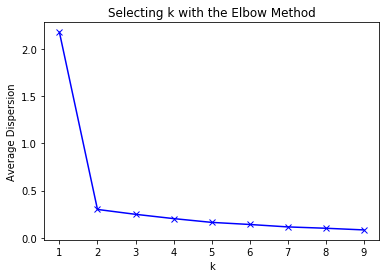

In [8]:
plt.plot(K, meanDispersions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [9]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [14]:
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.vstack((x1, x2)).T
X

array([[1, 1],
       [2, 3],
       [3, 2],
       [1, 2],
       [5, 8],
       [6, 6],
       [5, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [7, 1],
       [9, 3]])

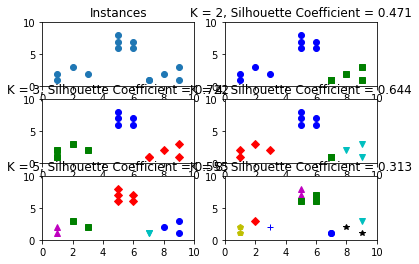

In [17]:
plt.subplot(3, 2, 1)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 8]
subplot_counter = 1
for t in tests:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
        plt.xlim([0, 10])
        plt.ylim([0, 10])
        plt.title('K = %s, Silhouette Coefficient = %.03f' % (t, metrics.silhouette_score(X, kmeans_model.labels_, metric='euclidean')))
plt.show()